In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
books = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv')

## 10k Most Popular Books Dataset

Firstly I will just get a feel for the size of the dataset.

In [3]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
len(books)

10000

I am going to use the top 500 books only otherwise the data is too skewed to see anything.

In [5]:
books_500 = books.loc[:499, :]
books_500

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


## Choose one variable and plot that variable four different ways

I choose original publication year.

In [6]:
books_500.original_publication_year.describe()


count     499.000000
mean     1959.078156
std       213.520387
min      -750.000000
25%      1965.000000
50%      1998.000000
75%      2007.000000
max      2016.000000
Name: original_publication_year, dtype: float64

There is a negative year which is nonsense. I will change to the positive version of the year.

In [7]:
books_500.loc[books_500['original_publication_year'] < 0, 'original_publication_year'] = abs(books_500.loc[books_500['original_publication_year'] < 0, 'original_publication_year'])

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
books_500.original_publication_year.describe()

count     499.000000
mean     1966.973948
std       120.538040
min       500.000000
25%      1965.000000
50%      1998.000000
75%      2007.000000
max      2016.000000
Name: original_publication_year, dtype: float64

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


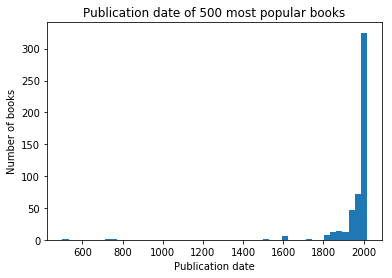

In [9]:
plt.hist(books_500.original_publication_year, bins=50)
plt.title('Publication date of 500 most popular books')
plt.ylabel('Number of books')
plt.xlabel('Publication date')
plt.show()

This plot shows that the vast majority of books were published after 1750, but is not a lot more informative than that.

In [10]:
books_500.loc[books_500['original_publication_year'].isnull(), 'original_publication_year'] = 0

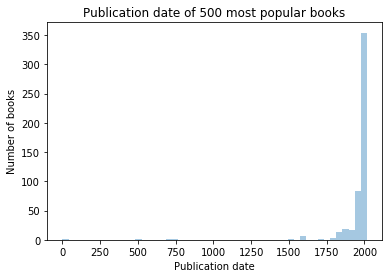

In [11]:
sns.distplot(books_500.original_publication_year, kde = False)
plt.title('Publication date of 500 most popular books')
plt.ylabel('Number of books')
plt.xlabel('Publication date')
plt.show()

Seaborn creates nicer date spacings but it is still difficult to see what is going on. I will try removing the very early dates.

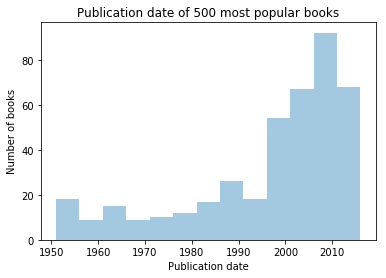

In [12]:
sns.distplot(books_500.loc[books_500['original_publication_year'] > 1950, 'original_publication_year'], kde = False)
plt.title('Publication date of 500 most popular books')
plt.ylabel('Number of books')
plt.xlabel('Publication date')
plt.show()

Reducing the dates covered makes this plot much more informative. It can be seen that the data is heavily skewed towards more recent years.

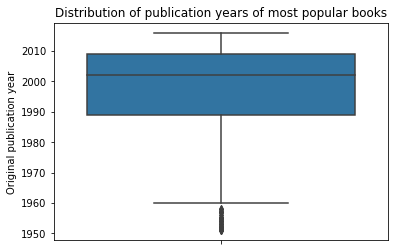

In [13]:
sns.boxplot(y=books_500.loc[books_500['original_publication_year'] > 1950, 'original_publication_year'])
plt.ylabel('Original publication year')
plt.title('Distribution of publication years of most popular books')
plt.show()

This plot is not very useful as the box itself can only be seen when the dates are dramatically cut off at around 1950. However, it does show that when considering the dates after 1950, 50% of the books were published between 1989-ish and 2009-ish, and 25% of the books were published after 2009.

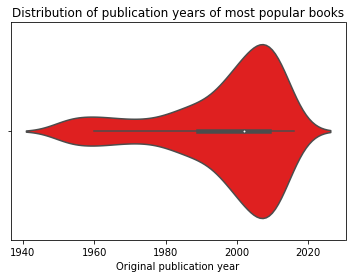

In [14]:
sns.violinplot(x=books_500.loc[books_500['original_publication_year']>1950, 'original_publication_year'], color='red')
plt.xlabel("Original publication year")
plt.title('Distribution of publication years of most popular books')
plt.show()

This plot is quite similar to the boxplot above. It indicates clearly when most books were published but is less useful if more years are included.

## Choose two continuous variables, and plot them three different ways

In [15]:
book_ratings = books.loc[:, ['book_id', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']]

In [16]:
books_500.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [17]:
book_500_ratings = books_500.loc[:, ['book_id', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']]
book_500_ratings_long = pd.melt(book_500_ratings, id_vars='book_id', var_name='rating_type', value_name='rating_count')
book_500_ratings_long.head()

,book_id,rating_type,rating_count
0,1,ratings_1,66715
1,2,ratings_1,75504
2,3,ratings_1,456191
3,4,ratings_1,60427
4,5,ratings_1,86236


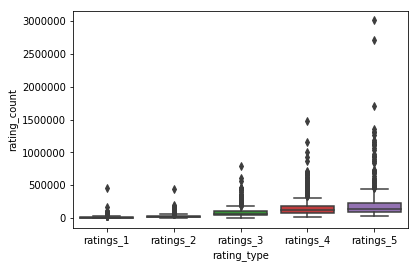

In [18]:
sns.boxplot(x='rating_type', y='rating_count', data=book_500_ratings_long)
plt.show()

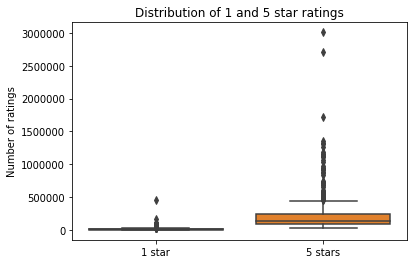

In [19]:
ratings = ['ratings_1', 'ratings_5']
book_500_ratings_1_5 = book_500_ratings_long[book_500_ratings_long.rating_type.isin(ratings)]

sns.boxplot(x='rating_type', y='rating_count', data=book_500_ratings_1_5)
plt.title('Distribution of 1 and 5 star ratings')
plt.ylabel('Number of ratings')
plt.xlabel('')
xtick_names = ['1 star', '5 stars']
plt.xticks([0, 1], xtick_names)
plt.show()

This chart shows that there are a small number of books which rated by a very large number of people. In other words, there are a few books which are read by loads of people, but most books are read by only a small number of people.

It also shows that more books are rated as 5 stars than 1 star. This is expected as these are the most popular books.

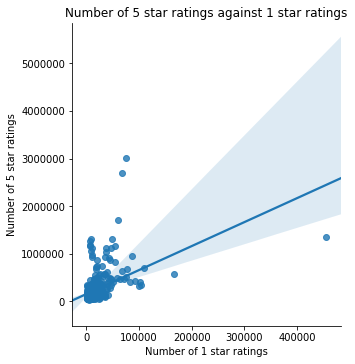

In [20]:
g = sns.lmplot(y='ratings_5', x='ratings_1', data=books_500)
plt.ylabel('Number of 5 star ratings')
g.set_xlabels('Number of 1 star ratings')
plt.title('Number of 5 star ratings against 1 star ratings')
plt.show()

This plot is also heavily skewed by some books with a large number of ratings, but the trend is clear - books with more 5 star ratings also get more 1 star ratings.

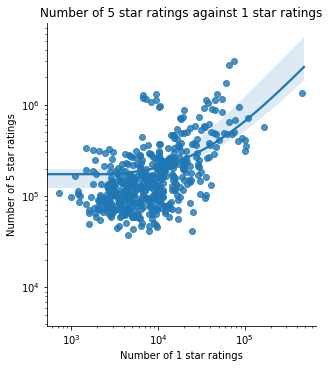

In [21]:
g = sns.lmplot(y='ratings_5', x='ratings_1', data=books_500)
plt.ylabel('Number of 5 star ratings')
g.set_xlabels('Number of 1 star ratings')
plt.title('Number of 5 star ratings against 1 star ratings')
g.set(xscale="log", yscale="log")
plt.show()

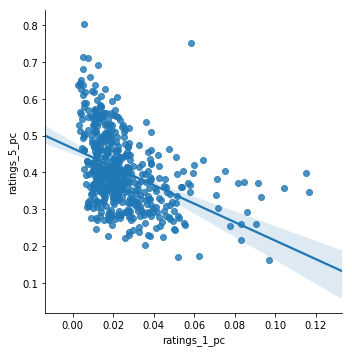

In [22]:
book_500_ratings['total_ratings'] = books_500['work_ratings_count']
book_500_ratings['ratings_1_pc'] = book_500_ratings['ratings_1'] / book_500_ratings['total_ratings']
book_500_ratings['ratings_2_pc'] = book_500_ratings['ratings_2'] / book_500_ratings['total_ratings']
book_500_ratings['ratings_3_pc'] = book_500_ratings['ratings_3'] / book_500_ratings['total_ratings']
book_500_ratings['ratings_4_pc'] = book_500_ratings['ratings_4'] / book_500_ratings['total_ratings']
book_500_ratings['ratings_5_pc'] = book_500_ratings['ratings_5'] / book_500_ratings['total_ratings']

g = sns.lmplot(x='ratings_1_pc', y='ratings_5_pc', data=book_500_ratings)
plt.show()

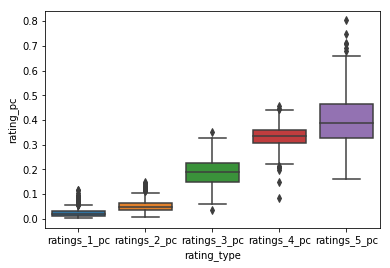

In [23]:
book_500_ratings_pc = book_500_ratings[['book_id', 'total_ratings', 'ratings_1_pc', 'ratings_2_pc', 'ratings_3_pc', 'ratings_4_pc', 'ratings_5_pc']]
book_500_ratings_pc_long = pd.melt(book_500_ratings_pc, id_vars=['book_id', 'total_ratings'], var_name='rating_type', value_name='rating_pc')

g = sns.boxplot(x='rating_type', y='rating_pc', data=book_500_ratings_pc_long)
plt.show()

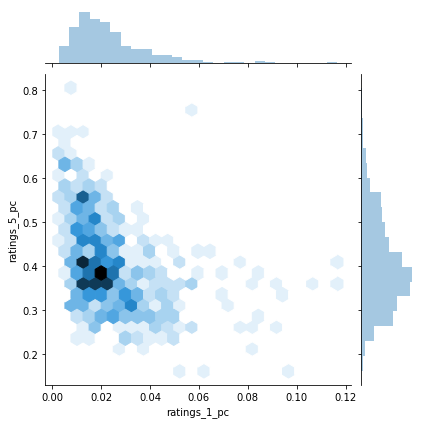

In [24]:
sns.jointplot(x='ratings_1_pc', y='ratings_5_pc', kind='hex', data=book_500_ratings_pc)
plt.show()

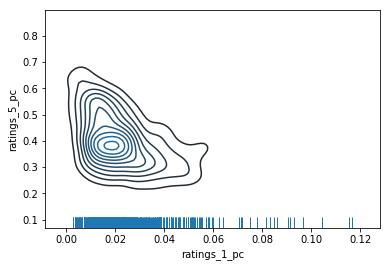

In [25]:
sns.kdeplot(book_500_ratings_pc.ratings_1_pc, book_500_ratings_pc.ratings_5_pc)
sns.rugplot(book_500_ratings_pc.ratings_1_pc)

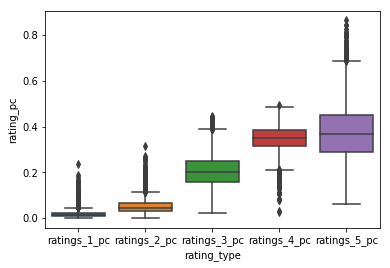

In [26]:
book_ratings['total_ratings'] = books['work_ratings_count']
book_ratings['ratings_1_pc'] = book_ratings['ratings_1'] / book_ratings['total_ratings']
book_ratings['ratings_2_pc'] = book_ratings['ratings_2'] / book_ratings['total_ratings']
book_ratings['ratings_3_pc'] = book_ratings['ratings_3'] / book_ratings['total_ratings']
book_ratings['ratings_4_pc'] = book_ratings['ratings_4'] / book_ratings['total_ratings']
book_ratings['ratings_5_pc'] = book_ratings['ratings_5'] / book_ratings['total_ratings']

book_ratings_pc = book_ratings[['book_id', 'total_ratings', 'ratings_1_pc', 'ratings_2_pc', 'ratings_3_pc', 'ratings_4_pc', 'ratings_5_pc']]
book_ratings_pc_long = pd.melt(book_ratings_pc, id_vars=['book_id', 'total_ratings'], var_name='rating_type', value_name='rating_pc')

g = sns.boxplot(x='rating_type', y='rating_pc', data=book_ratings_pc_long)
plt.show()

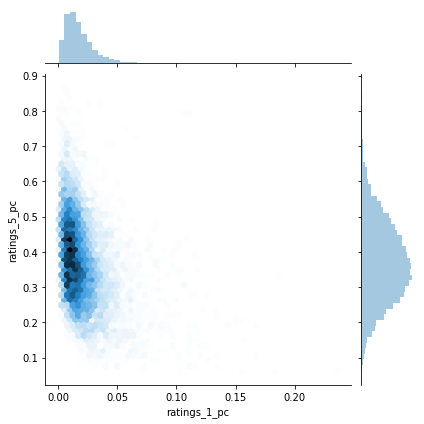

In [27]:
sns.jointplot(x='ratings_1_pc', y='ratings_5_pc', kind='hex', data=book_ratings_pc)
plt.show()

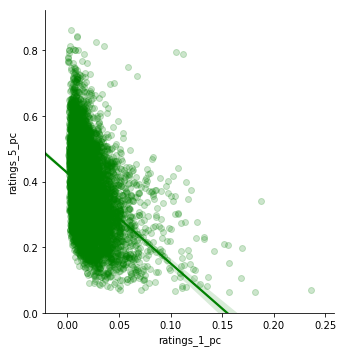

In [41]:
g = sns.lmplot(x='ratings_1_pc', y='ratings_5_pc', data=book_ratings,
            scatter_kws={'color':'green', 'alpha':0.2}, line_kws={'color':'green'})
g.set(ylim=(0, None))
plt.show()

In [29]:
len(book_ratings)

10000

In [42]:
books.columns.values

array(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors',
       'original_publication_year', 'original_title', 'title',
       'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'], dtype=object)

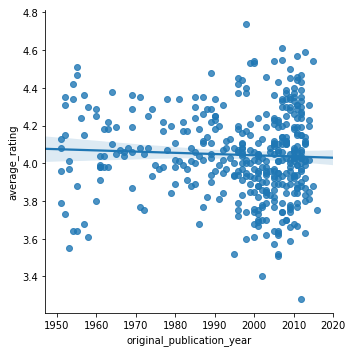

In [45]:
sns.lmplot(x='original_publication_year', y='average_rating', data=books_500[books_500.original_publication_year > 1950])

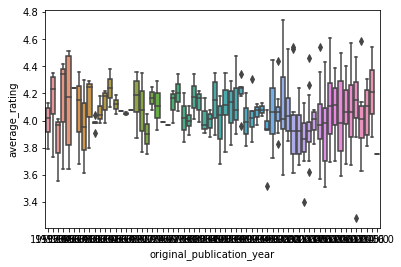

In [46]:
sns.boxplot(x='original_publication_year', y='average_rating', data=books_500[books_500.original_publication_year > 1950])

In [48]:
round(books.loc[1, 'average_rating'],0)


4.0

In [53]:
books['average_rating_cat'] = round(books['average_rating'], 0)
books.average_rating_cat.head(10)

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
5    4.0
6    4.0
7    4.0
8    4.0
9    4.0
Name: average_rating_cat, dtype: float64

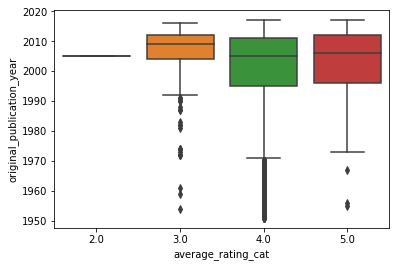

In [54]:
sns.boxplot(y='original_publication_year', x='average_rating_cat', data=books[books.original_publication_year > 1950])